# Autoencoder

## Unsupervised Learning with keras

Advantages
-----------------
- Custom compression
- Noise removal

Disadvantages
-----------------
- Sub-optimal compression
- Difficult to tweak

In [1]:
import os

# Download the data from our GitLab page
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/mnist_train.csv
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/mnist_test.csv

data_directory = os.path.join('/content/')

--2023-11-21 10:28:35--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/mnist_train.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/plain]
Saving to: ‘mnist_train.csv’

mnist_train.csv     100%[===================>] 104.50M  93.5MB/s    in 1.1s    

2023-11-21 10:28:36 (93.5 MB/s) - ‘mnist_train.csv’ saved [109575994/109575994]

--2023-11-21 10:28:37--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/mnist_test.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [text/plain]
Saving to: ‘mnist_test.csv’

mnist_test.csv      100%[===================>]  17.44M   105MB/s    in 0.2s    

2023-11-21 10:28:

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
import numpy as np
import tensorflow as tf
import random as python_random

seed_num = 42

python_random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

def compressed_xy_ratio(size: int):
    """
    This function computes the ratio for displaying pixels.
    :parameter size: the number of pixels in total
    :return: Tuple of X and Y for the pixels
    """
    # This function is only used to get a good ratio with the available pixels.
    # It is optimised to find the highest value for x and y.
    y_val = int(np.sqrt(float(size)))
    x_val = y_val
    while (x_val * y_val) != size:
        x_val -= 1
        y_val = int(size/x_val)
    return (x_val, y_val)


# A picture in this notebook is considered to be a 1D set of black/white float values. The ordinance of pixels in a Y-axis are not taken into account.
input_size = 784
encoded_size = 32 # this is the size of our encoded representations

# this is our input placeholder
input_img = Input(shape=(input_size,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoded_size, activation='linear', use_bias=True)(input_img)
# "decoded" is the lossy reconstruction of the input

decoded = Dense(input_size, activation='linear', use_bias=True)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoded_size,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='Nadam')

print(f"The data will be compressed: {input_size/encoded_size}x")

The data will be compressed: 24.5x


Now that the network topology has been decided, the data is loaded.

In [3]:
train_data = np.loadtxt(os.path.join(data_directory, 'mnist_train.csv'),
                        delimiter=",")
test_data = np.loadtxt(os.path.join(data_directory, 'mnist_test.csv'),
                        delimiter=",")

# The data is a list of integer values between 0 and 255 indicating the greyscale value of a pixel.
# Each written digit has been converted to a list of these pixel values.
# Because of the internal workings of (many) neural networks, the we want the x values to be floating point values
# in the range of [0, 1]. And some algortihms perform better when presented with a range of (0, 1].
# To this end, we first perform a normalisation (by computing fac) and adding a small value.
fac = 0.99 / 255
x_train = np.asfarray(train_data[:, 1:]) * fac + 0.01
x_test = np.asfarray(test_data[:, 1:]) * fac + 0.01

We can now train the network.

In [4]:
# Just as with the perceptron, we are calling the fit function.

# We are trying to predict the original input back as good as possible, therefore we are giving x_train in as input and expected_output
# The epochs represent the number of passes over all train-data that have to be followed.
# The batch size describes how many inputs should be grouped together. (Smaller amounts take longer, larger amounts might not converge.)
autoencoder.fit(x_train, x_train,
                epochs=30, #prev 50
                batch_size=50, #prev 200
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1200/1200 [==============================] - 11s 5ms/step - loss: 0.0247 - accuracy: 0.0124 - val_loss: 0.0169 - val_accuracy: 0.0132
Epoch 2/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0172 - accuracy: 0.0116 - val_loss: 0.0167 - val_accuracy: 0.0133
Epoch 3/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0172 - accuracy: 0.0111 - val_loss: 0.0167 - val_accuracy: 0.0139
Epoch 4/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0171 - accuracy: 0.0110 - val_loss: 0.0167 - val_accuracy: 0.0129
Epoch 5/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0171 - accuracy: 0.0115 - val_loss: 0.0167 - val_accuracy: 0.0136
Epoch 6/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0171 - accuracy: 0.0115 - val_loss: 0.0167 - val_accuracy: 0.0132
Epoch 7/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0171 - accuracy: 0.0112 - val_loss: 0.0166 - val_accuracy

Encode and decode images to view how the algorithm alters the content.

In [5]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


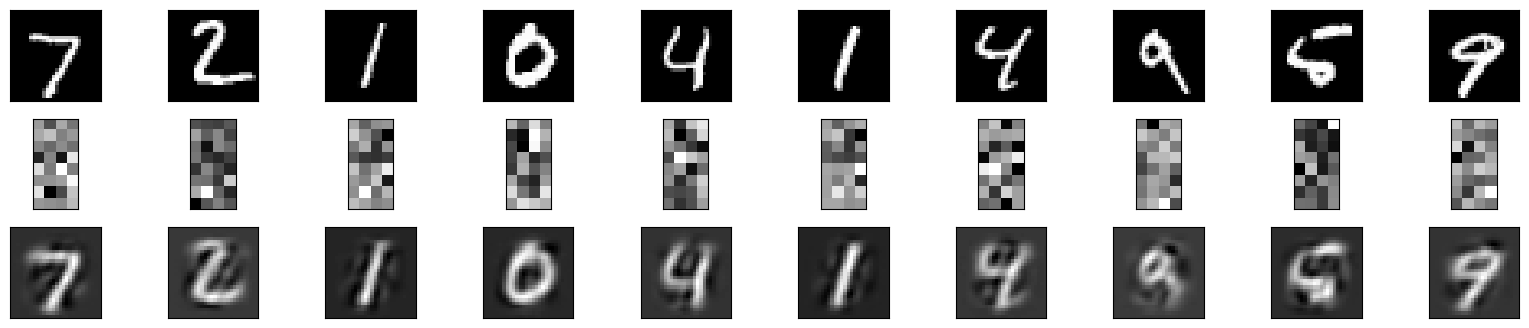

In [6]:

import matplotlib.pyplot as plt

uncompressed_x, uncompressed_y = compressed_xy_ratio(input_size)
compressed_x, compressed_y = compressed_xy_ratio(encoded_size)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(uncompressed_y, uncompressed_x))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(compressed_y, compressed_x))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(uncompressed_y, uncompressed_x))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Remove noise
As an auto-encoder should retain only the essence of the information in the data, it should be able to remove noise.

To test this we are going to train a network in the following setting:
1. Given a random distorted input
2. Let the network compress and decompress the data
3. Correct the output with a cleaned example

This flow should teach the network to model a random noise filter.

In [7]:
# create a random noisy train and test set
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values between 0 and 1. If it is larger than 1 or smaller than 0, it is reduced to 1 or 0 respectively.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [8]:
# this is the size of our encoded representations
input_size = 784
encoded_size = 32

# this is our input placeholder
input_img = Input(shape=(input_size,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoded_size, activation='linear', use_bias=True)(input_img)
# "decoded" is the lossy reconstruction of the input

decoded = Dense(input_size, activation='linear', use_bias=True)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded input
encoded_input = Input(shape=(encoded_size,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='Nadam')

In [9]:
# as stated before, we are now giving noiy input data and trying to let it decompress to not noisy data
# but this also needs to be done on the validation data to get a good comparisson
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=50,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1200/1200 [==============================] - 6s 4ms/step - loss: 0.0341 - accuracy: 0.0103 - val_loss: 0.0247 - val_accuracy: 0.0121
Epoch 2/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0249 - accuracy: 0.0114 - val_loss: 0.0244 - val_accuracy: 0.0131
Epoch 3/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0247 - accuracy: 0.0125 - val_loss: 0.0243 - val_accuracy: 0.0131
Epoch 4/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0247 - accuracy: 0.0120 - val_loss: 0.0243 - val_accuracy: 0.0132
Epoch 5/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0246 - accuracy: 0.0117 - val_loss: 0.0243 - val_accuracy: 0.0139
Epoch 6/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0246 - accuracy: 0.0122 - val_loss: 0.0242 - val_accuracy: 0.0139
Epoch 7/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0246 - accuracy: 0.0118 - val_loss: 0.0242 - val_accuracy:

313/313 [==============================] - 1s 2ms/step


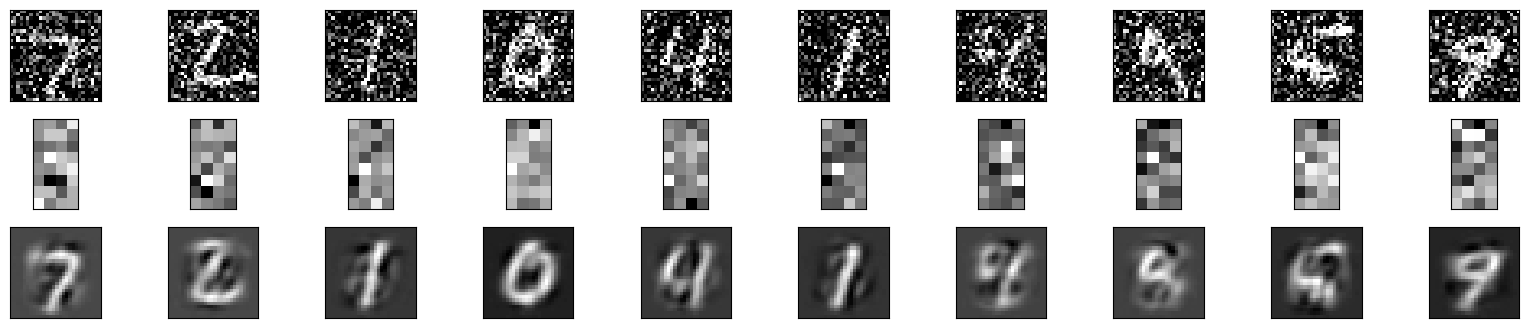

In [10]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)


uncompressed_x, uncompressed_y = compressed_xy_ratio(input_size)
compressed_x, compressed_y = compressed_xy_ratio(encoded_size)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(uncompressed_y, uncompressed_x))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(compressed_y, compressed_x))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(uncompressed_y, uncompressed_x))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()